# Problem 2
<img src="problem2.png">

In [31]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
SSE_EB = []
SSE_MLE = []
sigma_sq = 0.0004
for i in range(1000):
    # Create 10 measurement of theta and then use this theta to get measurement
    theta = norm.rvs(loc = 5.67, scale = 0.01, size = 10)
    post = norm.rvs(loc = theta, scale = 0.02, size = 10)
    
    s_sq = np.mean((post - np.mean(post)) ** 2)
    tau = 0
    if s_sq >= sigma_sq:
        tau = s_sq - sigma_sq
    else:
        tau = sigma_sq - s_sq
    
    theta_eb = (sigma_sq / (tau + sigma_sq)) * np.mean(post) + (tau / (tau + sigma_sq)) * post
    
    SSE_EB.append(sum((theta - theta_eb) ** 2))
    SSE_MLE.append(sum((theta - post) ** 2))
    
print(len(SSE_EB))
print(len(SSE_MLE))

1000
1000


Empirical Bayes Mean:  0.0012993749815510792
Empirical Bayes Variance:  0.00000077448557004132


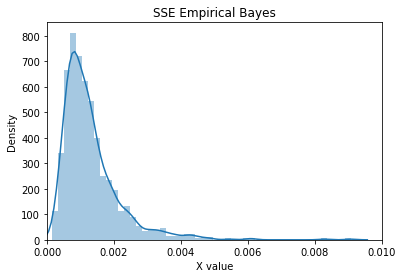

In [61]:
print("Empirical Bayes Mean: ", np.mean(SSE_EB))
print("Empirical Bayes Variance: ", '{:.20f}'.format(np.var(SSE_EB)))
sns.distplot(SSE_EB, hist=True, rug=False)
plt.title("SSE Empirical Bayes")
plt.xlim(0, 0.01)
plt.ylabel("Density")
plt.xlabel("X value")
plt.show()

Maximum Likelihood Estimator Mean:  0.003952442121529867
Maximum Likelihood Estimator Variance:  0.00000360479159291073


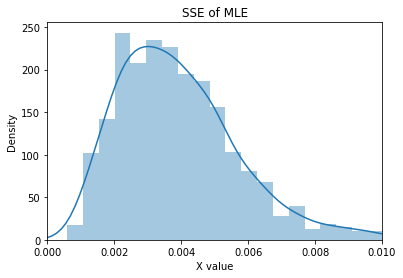

In [63]:
print("Maximum Likelihood Estimator Mean: ", np.mean(SSE_MLE))
print("Maximum Likelihood Estimator Variance: ", '{:.20f}'.format(np.var(SSE_MLE)))
sns.distplot(SSE_MLE, hist=True, rug=False);
plt.title("SSE of MLE")
plt.xlim(0, 0.01)
plt.ylabel("Density")
plt.xlabel("X value")
plt.show()

Obviously, Emprical Bayes Estimator is more concentrated than MLE. Its mean is 0.0012993749815510792 which is smaller than MLE's mean (0.003952442121529867). And, EB's variance is smaller than MLE's, too.